In [3]:
# Imports
import pandas as pd
from sklearn import model_selection
from sklearn import preprocessing
from sklearn import neighbors
from sklearn import metrics
from sklearn import dummy
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [4]:
# Fichier source
data = pd.read_csv('winequality-red.csv', sep=";")

X = data.as_matrix(data.columns[:-1])
y = data.as_matrix([data.columns[-1]])
y = y.flatten()

print(X.shape)
print(y.shape)

(1599, 11)
(1599,)


In [14]:
# Séparation training/testing
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

# Scaling
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train_std = std_scale.transform(X_train)
X_test_std = std_scale.transform(X_test)

In [6]:
taille = 100

In [50]:
msq_random, msq_dum, msq_pred, r2_random, r2_dum, r2_pred = prediction(taille+1)

MSE prédiction : 0.44
MSE moyenne    : 0.63
MSE random     : 3.02


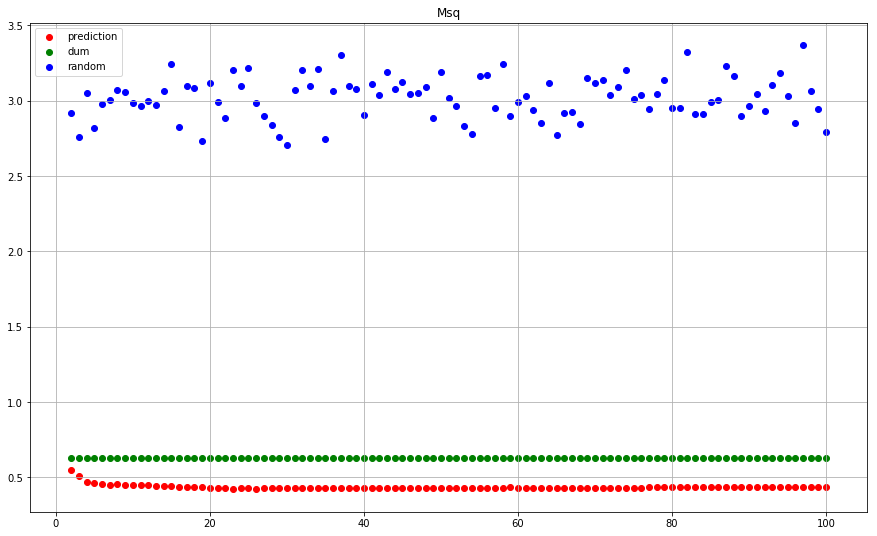

In [51]:
plt.figure(1, figsize=(15, 9))
plt.scatter(range(2,taille+1), msq_pred, color='red', label='prediction')
plt.scatter(range(2,taille+1), msq_dum, color='green', label='dum')
plt.scatter(range(2,taille+1), msq_random, color='blue', label='random')

plt.title("Msq")
plt.legend()
plt.grid('on')

print("MSE prédiction : %.2f" % mean(msq_pred))
print("MSE moyenne    : %.2f" % mean(msq_dum))
print("MSE random     : %.2f" % mean(msq_random))

r2 prédiction : 0.31
r2 moyenne    : -0.00
r2 random     : 3.81


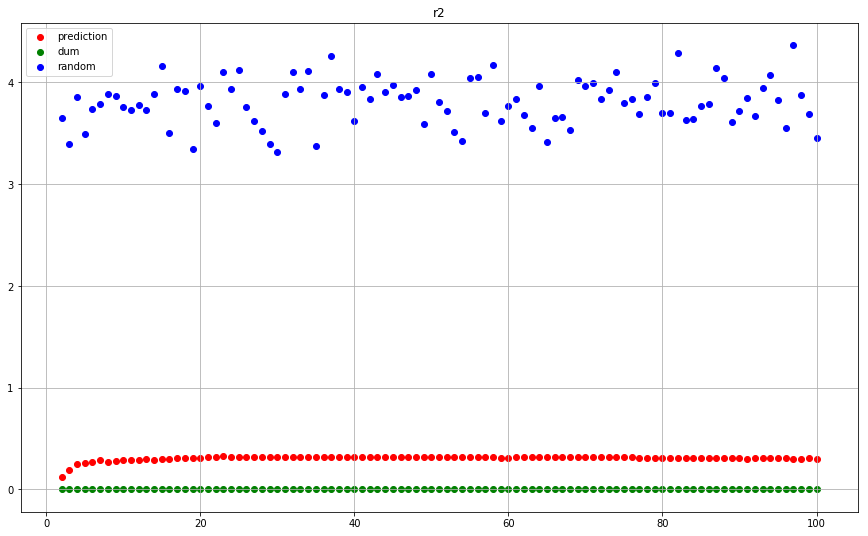

In [54]:
plt.figure(1, figsize=(15, 9))
plt.scatter(range(2,taille+1), r2_pred, color='red', label='prediction')
plt.scatter(range(2,taille+1), r2_dum, color='green', label='dum')
plt.scatter(range(2,taille+1), r2_random, color='blue', label='random')

plt.title("r2")
plt.legend()
plt.grid('on')

print("r2 prédiction : %.2f" % mean(r2_pred))
print("r2 moyenne    : %.2f" % mean(r2_dum))
print("r2 random     : %.2f" % mean(r2_random))

In [49]:
def prediction(p):
    msq_random = []
    msq_dum = []
    msq_pred = []
    
    r2_random = []
    r2_dum = []
    r2_pred = []
    
    for n in range(2,p):
        #print("Pour n = ",n)
        # Prédiction aléatoire
        y_pred_random = np.random.randint(np.min(y), np.max(y), y_test.shape)
        
        # Résultats
        #print("MSE aléatoire \t\t: %.2f" % metrics.mean_squared_error(y_test, y_pred_random)) 

        # Prédiction suivant la valeur aléatoire
        dum = dummy.DummyRegressor(strategy='mean')
        dum.fit(X_train_std, y_train)
        y_pred_dum = dum.predict(X_test_std) # Prédiction sur le jeu de test

        # Evaluate
        #print("MSE valeur moyenne \t: %.2f" % metrics.mean_squared_error(y_test, y_pred_dum))

        # Algorithme des plus proches voisins
        knn = neighbors.KNeighborsRegressor(n_neighbors=n)
        res = knn.fit(X_train_std, y_train)
        y_pred = knn.predict(X_test_std) # Prédictions des scores suivant les données de départ X

        # Mean Square Error
        #print("MSE prédiction \t\t: %.2f\n" % metrics.mean_squared_error(y_test, y_pred))

        # Comparaison des r2
        #print("R2 aléatoire \t\t: %.2f" % metrics.r2_score(y_test, y_pred_random))
        #print("R2 valeur moyenne \t: %.2f" % metrics.r2_score(y_test, y_pred_dum))
        #print("R2 prédiction \t\t: %.2f\n" % metrics.r2_score(y_test, y_pred))

        # Save des résultats
        msq_random.append(metrics.mean_squared_error(y_test, y_pred_random))
        msq_dum.append(metrics.mean_squared_error(y_test, y_pred_dum))
        msq_pred.append(metrics.mean_squared_error(y_test, y_pred))

        r2_random.append(-metrics.r2_score(y_test, y_pred_random))
        r2_dum.append(metrics.r2_score(y_test, y_pred_dum))
        r2_pred.append(metrics.r2_score(y_test, y_pred))

    return msq_random, msq_dum, msq_pred, r2_random, r2_dum, r2_pred

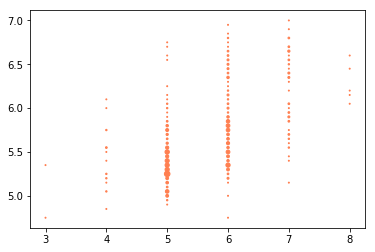

In [20]:
# Création du dictionnaire pour la répresentation graphique
# clé : coordonnées ; valeur : nombre de points à ces coordonnées
sizes = {} 

# Algorithme des plus proches voisins
knn = neighbors.KNeighborsRegressor(n_neighbors=20)
res = knn.fit(X_train_std, y_train)

# Prédictions des scores suivant les données de départ X
y_pred = knn.predict(X_test_std) 
        
for (yt, yp) in zip(list(y_test), list(y_pred)):
    if (yt,yp) in sizes :
        sizes[(yt, yp)] += 1
    else:
        sizes[(yt, yp)] = 1

keys = sizes.keys()

# vraie valeur (abscisse)
# valeur predite (ordonnee)
# taille du marqueur
plt.scatter([k[0] for k in keys], [k[1] for k in keys], s=[sizes[k] for k in keys], color='coral')

In [22]:
print(np.min(y))
print(np.max(y))
print(y_test.shape)

3
8
(480,)


NameError: name 'y_pred_dum' is not defined